# Loan 데이터 분류나무

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.isnull().sum().sum()

0

In [4]:
df['job'] = df['job'].replace({'Office':0, 'ProfExe':1, 'Other':2, 'Mgr':3, 'Self':4, 'Sales':5})
df.groupby('job').mean()

y          loan      mortgage  workyear  delinquency      period  \
job                                                                            
0    0.180909  18104.440000  67958.616364  8.399091     0.436364  177.157945   
1    0.204577  18883.011096  92253.009709  8.751040     0.417476  194.267684   
2    0.232263  17911.422167  62103.232616  9.272503     0.374162  172.503607   
3    0.279412  18947.905462  80028.710084  9.172269     0.558824  173.443193   
4    0.403226  23403.201613  85134.940860  7.793011     0.534946  172.465457   
5    0.414384  16926.616438  76520.465753  8.065068     0.400685  178.711438   

      inquire   transact        DTI  
job                                  
0    1.017273  21.200909  34.772091  
1    1.044383  24.070042  33.676685  
2    1.288740  19.263678  34.464261  
3    1.477941  22.580882  36.054979  
4    1.411290  22.432796  36.581478  
5    1.184932  22.595890  36.410377

### 나무 모형

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X = df.drop(['y'], axis=1)
y = df['y']
xname = X.columns
yname = ['Normal','Bad']

### Default 트리

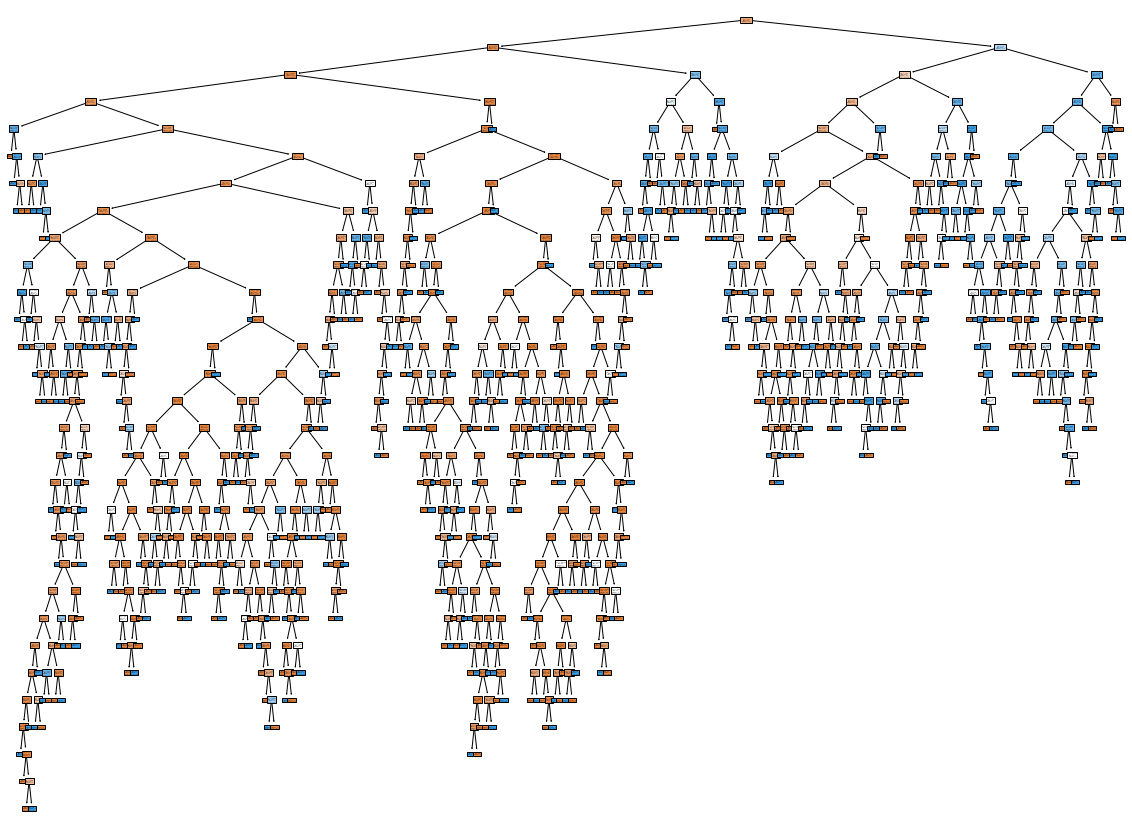

In [6]:
c_tree = DecisionTreeClassifier(random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(20,15))
plot_tree(c_tree, filled=True) 
plt.show()

### max_depth=1 트리

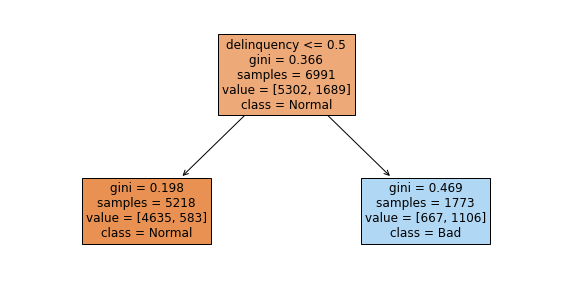

In [7]:
c_tree = DecisionTreeClassifier(max_depth=1,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(10,5))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

### max_depth=2 트리

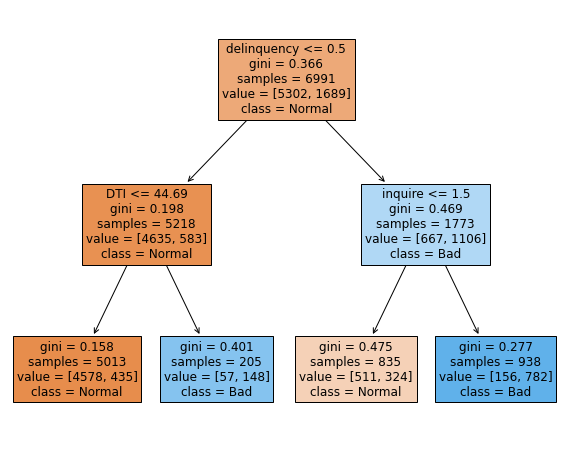

In [8]:
c_tree = DecisionTreeClassifier(max_depth=2,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(10,8))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

### max_depth=4 트리

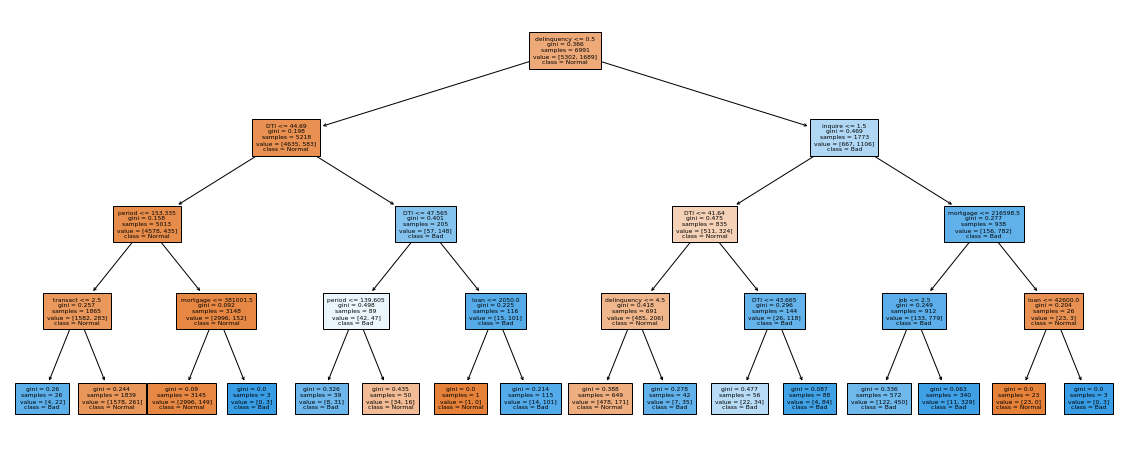

In [9]:
c_tree = DecisionTreeClassifier(max_depth=4,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(20,8))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=6) 
plt.show()

### min_samples_split=6000 트리

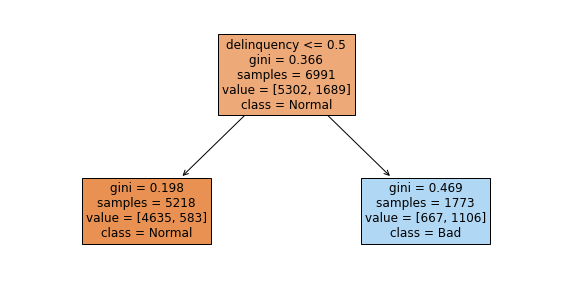

In [10]:
c_tree = DecisionTreeClassifier(min_samples_split=6000,random_state=0)
c_tree.fit(X, y)
plt.figure(figsize=(10,5))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

### min_samples_split=4000 트리

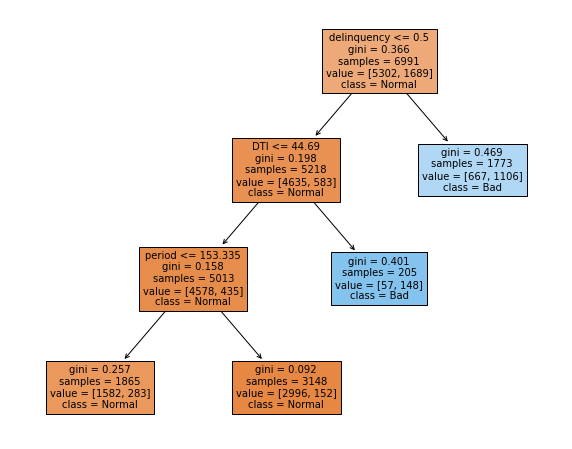

In [11]:
c_tree = DecisionTreeClassifier(min_samples_split=4000,random_state=0)
c_tree.fit(X, y)
plt.figure(figsize=(10,8))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=10) 
plt.show()

### min_samples_split=2000 트리

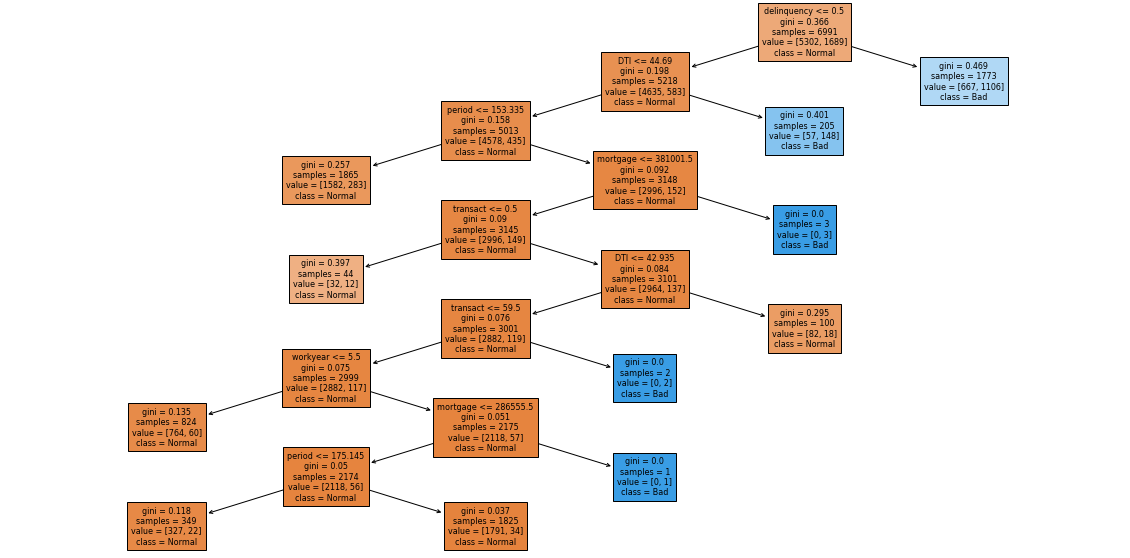

In [12]:
c_tree = DecisionTreeClassifier(min_samples_split=2000,random_state=0)
c_tree.fit(X, y)
plt.figure(figsize=(20,10))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=8) 
plt.show()

### min_impurity_decrease=0.01 트리

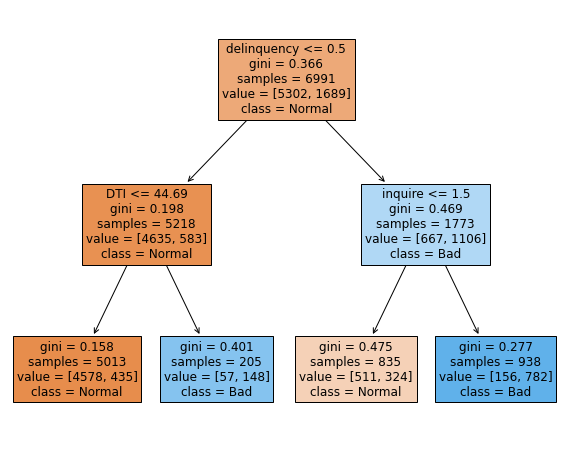

In [13]:
c_tree = DecisionTreeClassifier(min_impurity_decrease=0.01,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(10,8))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

### min_impurity_decrease=0.005 트리

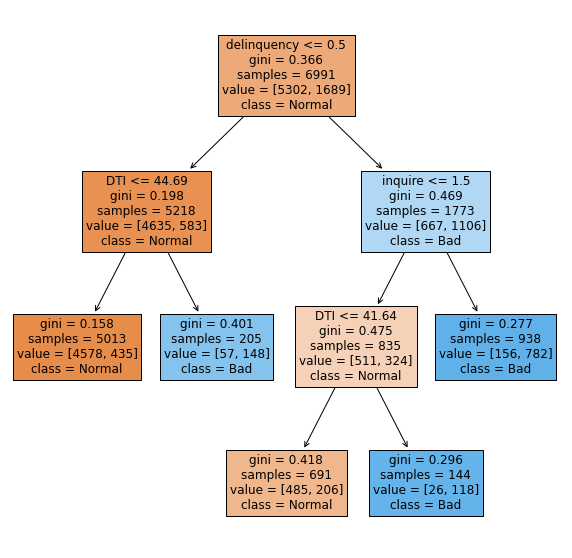

In [14]:
c_tree = DecisionTreeClassifier(min_impurity_decrease=0.005,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(10,10))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

### min_impurity_decrease=0.001 트리

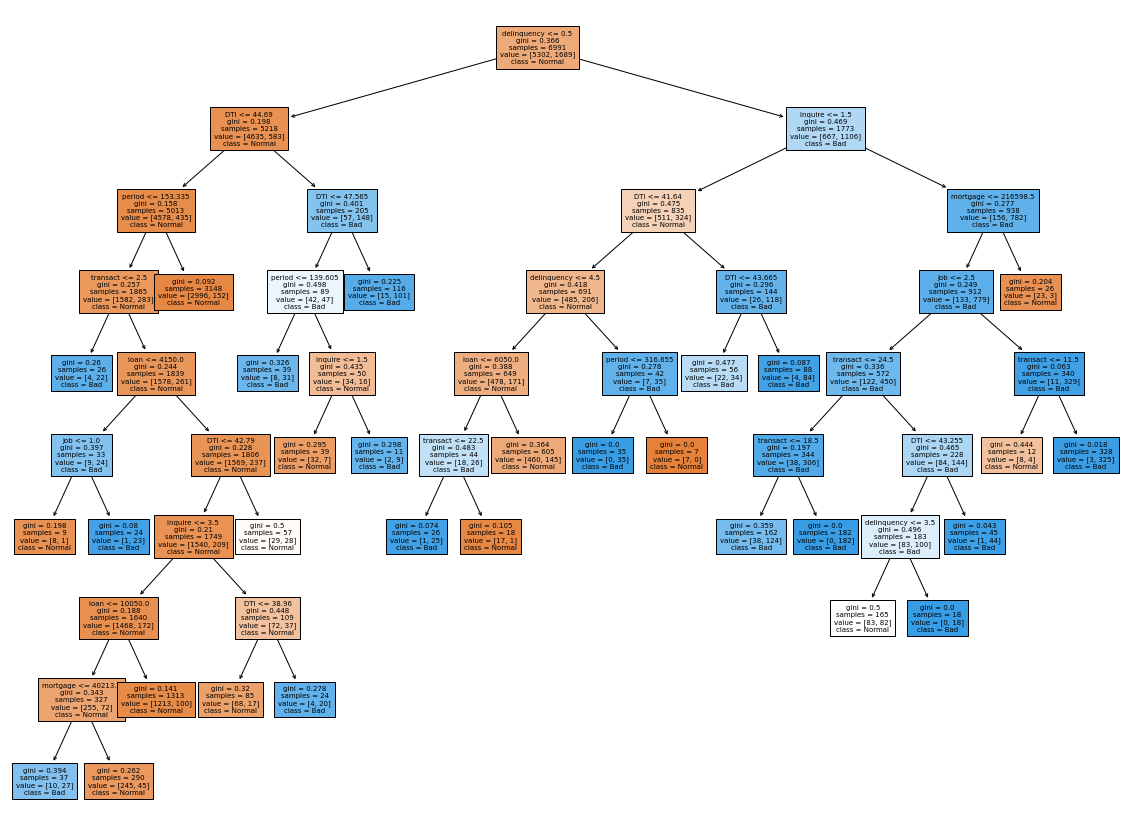

In [15]:
c_tree = DecisionTreeClassifier(min_impurity_decrease=0.001,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(20,15))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=7) 
plt.show()

### Alpha=0.5 트리

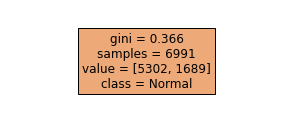

In [16]:
c_tree = DecisionTreeClassifier(ccp_alpha=0.5,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(5,2))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

In [17]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /Users/hyunjoongkim/opt/anaconda3/lib/python3.8/site-packages (1.0)


### Alpha=0.005 트리

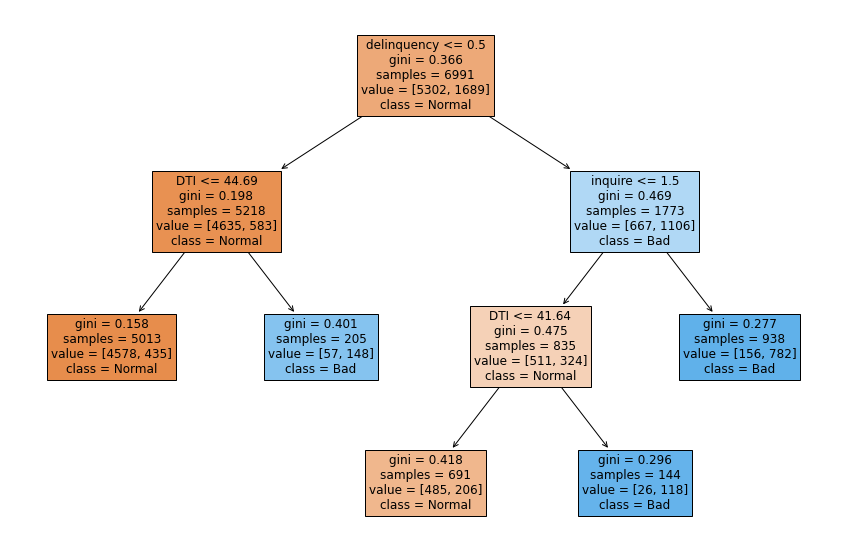

In [18]:
c_tree = DecisionTreeClassifier(ccp_alpha=0.005,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(15,10))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

### Alpha=0.001 트리

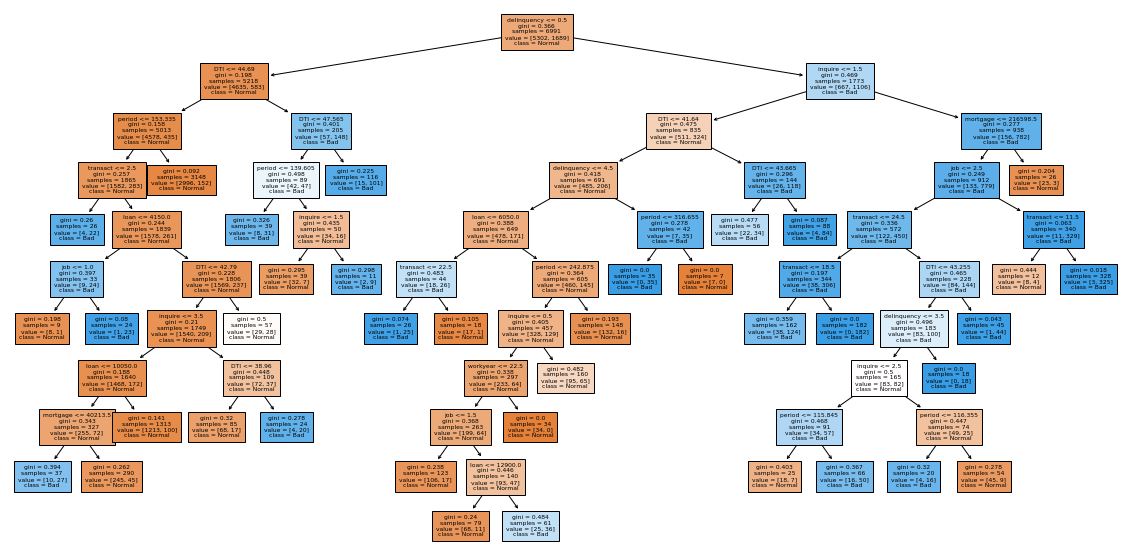

In [19]:
c_tree = DecisionTreeClassifier(ccp_alpha=0.001,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(20,10))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=6) 
plt.show()

### 모든 Alpha 와 Impurity의 계산

In [20]:
c_tree = DecisionTreeClassifier(random_state=0) 
path = c_tree.cost_complexity_pruning_path(X, y)
path = pd.DataFrame(path)
path

ccp_alphas  impurities
0      0.000000    0.000000
1      0.000092    0.000554
2      0.000094    0.000837
3      0.000095    0.001122
4      0.000099    0.001420
..          ...         ...
245    0.003947    0.210085
246    0.009265    0.219351
247    0.022731    0.242082
248    0.025101    0.267183
249    0.099272    0.366455

[250 rows x 2 columns]

### Alpha 와 Impurity의 관계

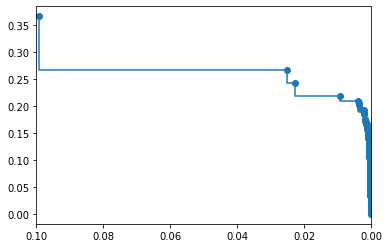

In [21]:
fig, ax = plt.subplots()
ax.plot(path.ccp_alphas, path.impurities, marker='o', drawstyle="steps-post")
ax.set_xlim(0.1, 0)  # decreasing order
plt.show()

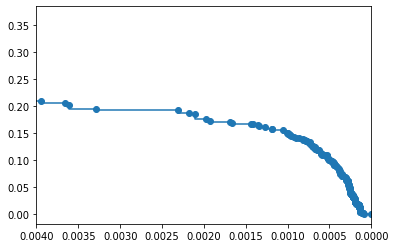

In [22]:
fig, ax = plt.subplots()
ax.plot(path.ccp_alphas, path.impurities, marker='o', drawstyle="steps-post")
ax.set_xlim(0.004, 0)  # decreasing order
plt.show()

### 최적의 Alpha를 찾는 방법

In [23]:
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.005, 0.0001)}, cv=10, n_jobs=-1)
g_cv.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
       0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
       0.0048, 0.0049])})

In [24]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0033}
score   : 0.7390145105252401


### Alpha=0.0033 트리

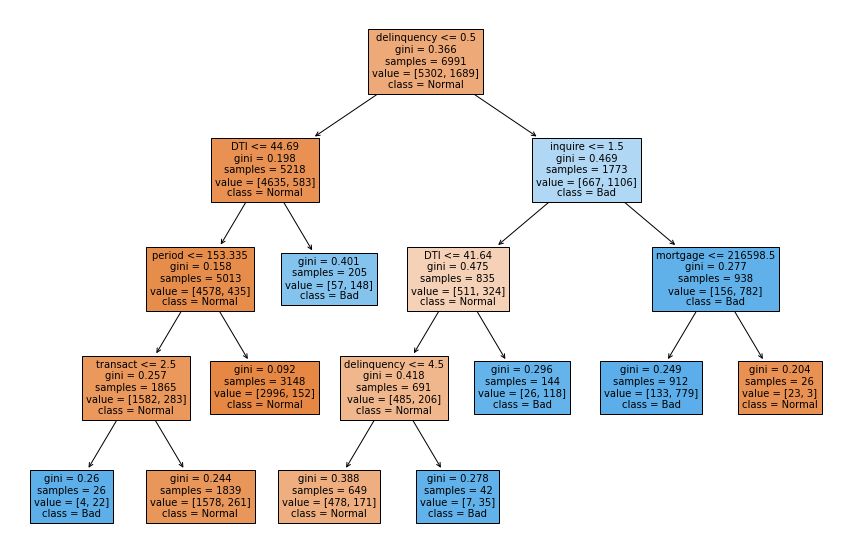

In [25]:
c_tree = DecisionTreeClassifier(ccp_alpha=0.0033,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(15,10))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=10) 
plt.show()

### 하이퍼파라미터 튜닝

In [26]:
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.005, 0.0001),
                          'min_impurity_decrease': np.arange(0,0.003,0.0005),
                          'min_samples_split': np.arange(800,1200,200)},
                    cv=10, n_jobs=-1)
g_cv.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
       0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
       0.0048, 0.0049]),
                         'min_impurity_decrease': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025]),
                         'min_samples_split': array([ 800, 1000])})

In [27]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0, 'min_impurity_decrease': 0.001, 'min_samples_split': 1000}
score   : 0.7398759452278766


### Alpha=0.0, min_impurity_decrease=0.001,  min_samples_split=1000  트리

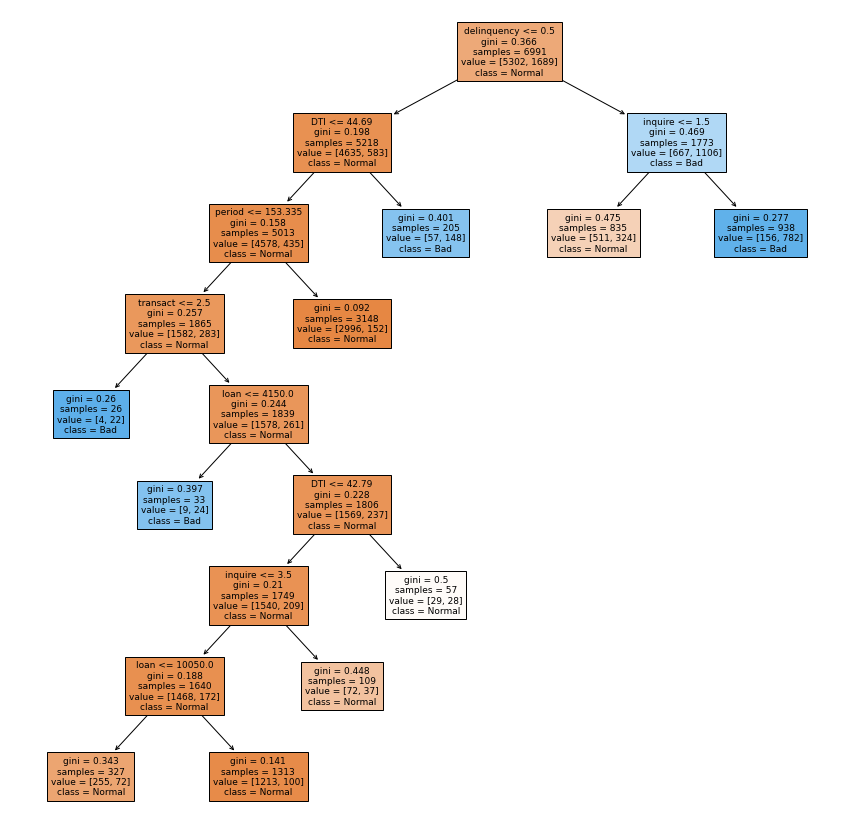

In [28]:
c_tree = DecisionTreeClassifier(ccp_alpha=0.0,min_impurity_decrease=0.001,min_samples_split=1000,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(15,15))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=9) 
plt.show()

## Train/Test 데이터 분할

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

### 하이퍼파라미터 튜닝

In [30]:
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.002, 0.0001),
                          'min_impurity_decrease': np.arange(0,0.003,0.0005),
                          'min_samples_split': np.arange(2,402,100)},
                    cv=10, n_jobs=-1)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019]),
                         'min_impurity_decrease': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025]),
                         'min_samples_split': array([  2, 102, 202, 302])})

In [31]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0, 'min_impurity_decrease': 0.0005, 'min_samples_split': 2}
score   : 0.8960410273894761


### Alpha=0.0, min_impurity_decrease=0.0005,  min_samples_split=2  트리

In [32]:
c2_tree = DecisionTreeClassifier(ccp_alpha=0.0,min_impurity_decrease=0.0005,min_samples_split=2,random_state=0)
c2_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=0)

## 다른 분류방법과의 비교

### 로지스틱 회귀분석

In [33]:
from sklearn.linear_model import LogisticRegression
c_logit = LogisticRegression(random_state=0, max_iter = 1000)
c_logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### 신경망분석

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
c_nn = MLPClassifier(hidden_layer_sizes=(5),random_state=0, max_iter = 1000)
c_nn.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=0)

### SVM

In [35]:
from sklearn import svm
c_svm = svm.SVC(kernel='rbf', random_state=0)
c_svm.fit(X_train_scaled,y_train)

SVC(random_state=0)

### 랜덤포레스트

In [36]:
from sklearn.ensemble import RandomForestClassifier
c_rf = RandomForestClassifier(random_state=0)
c_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

### ROC 곡선 및 AUC

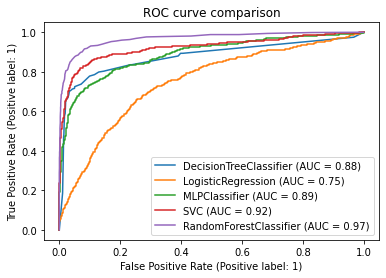

In [37]:
from sklearn.metrics import RocCurveDisplay
roc_tree=RocCurveDisplay.from_estimator(c2_tree, X_test, y_test)
RocCurveDisplay.from_estimator(c_logit, X_test, y_test, ax = roc_tree.ax_)
RocCurveDisplay.from_estimator(c_nn, X_test_scaled, y_test, ax = roc_tree.ax_)
RocCurveDisplay.from_estimator(c_svm, X_test_scaled, y_test, ax = roc_tree.ax_)
RocCurveDisplay.from_estimator(c_rf, X_test, y_test, ax = roc_tree.ax_)
plt.title("ROC curve comparison")
plt.show()

### 예측확률계산

In [38]:
smith = [12000, 50000, 1, 4, 0, 122, 0, 16, 29.5]
johnson = [22000, 85000, 2, 11, 1, 219, 2, 26, 44.8]
people = [smith, johnson] # to make a dataframe
people = pd.DataFrame(people, 
                      columns=['loan','mortgage','job','workyear','delinquency','period','inquire','transact','DTI'])
people

loan  mortgage  job  workyear  delinquency  period  inquire  transact  \
0  12000     50000    1         4            0     122        0        16   
1  22000     85000    2        11            1     219        2        26   

    DTI  
0  29.5  
1  44.8

In [39]:
c2_tree.predict_proba(people)

array([[0.91304348, 0.08695652],
       [0.        , 1.        ]])

# 회귀나무 예제 (CAT 점수 데이터)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('copdcat.csv' ,header=0)
X=df.drop(["CATScore"],axis=1)
y=df["CATScore"]

## 데이터 구분 : 학습 데이터와 검증데이터

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

### 회귀나무 하이퍼파라미터 튜닝

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.01, 0.001),
                          'min_impurity_decrease': np.arange(0,0.01,0.001),
                          'min_samples_split': np.arange(2,402,100)},
                    cv=10, n_jobs=-1)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009]),
                         'min_impurity_decrease': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009]),
                         'min_samples_split': array([  2, 102, 202, 302])})

In [44]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0, 'min_impurity_decrease': 0.007, 'min_samples_split': 2}
score   : 0.7821991304485522


### Alpha=0.0, min_impurity_decrease=0.007,  min_samples_split=2  트리

In [45]:
r1_tree = DecisionTreeRegressor(ccp_alpha=0.0,min_impurity_decrease=0.007,min_samples_split=2,random_state=0)
r1_tree.fit(X_train, y_train)

DecisionTreeRegressor(min_impurity_decrease=0.007, random_state=0)

### Default 트리

In [46]:
r2_tree = DecisionTreeRegressor(random_state=0) 
r2_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### 선형 회귀분석

In [47]:
from sklearn.linear_model import LinearRegression
r_linear = LinearRegression(fit_intercept = True)
r_linear.fit(X_train ,y_train)

LinearRegression()

### 신경망분석

In [48]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
r_nn = MLPRegressor(hidden_layer_sizes=(5), random_state=0, max_iter = 1000)
r_nn.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=5, max_iter=1000, random_state=0)

### SVR

In [49]:
from sklearn.svm import SVR, SVC
r_svr = SVR(kernel='rbf') 
r_svr.fit(X_train_scaled, y_train)

SVR()

### 랜덤포레스트

In [50]:
from sklearn.ensemble import RandomForestRegressor
r_rf = RandomForestRegressor(random_state=0)
r_rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

### 평균절대오차비율 (MAPE) 비교

In [51]:
from sklearn.metrics import mean_absolute_percentage_error
print('Pruned Tree      :',mean_absolute_percentage_error(y_test,r1_tree.predict(X_test)))
print('Default Tree     :',mean_absolute_percentage_error(y_test,r2_tree.predict(X_test)))
print('Linear Regression:',mean_absolute_percentage_error(y_test,r_linear.predict(X_test)))
print('Neural Nerwork   :',mean_absolute_percentage_error(y_test,r_nn.predict(X_test_scaled)))
print('SV Regression    :',mean_absolute_percentage_error(y_test,r_svr.predict(X_test_scaled)))
print('Random Forest    :',mean_absolute_percentage_error(y_test,r_rf.predict(X_test)))

Pruned Tree      : 0.14905667093289068
Default Tree     : 0.18306681999302996
Linear Regression: 0.15440779388364254
Neural Nerwork   : 0.13248692631029885
SV Regression    : 0.1403771094380727
Random Forest    : 0.13677986307133289
